# Euthanasietrends bij Zwitserse non-profit Dignitas

De data geleverd door [Dignitas](http://www.dignitas.ch/index.php?option=com_content&view=article&id=32&Itemid=72&lang=en) bevat informatie over het aantal leden van de organisatie en het aantal werkelijke euthanasiegevallen per land en per jaar.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

members = pd.read_excel("data/raw/dignitas_leden.xlsx")
suicides = pd.read_excel("data/raw/dignitas_euthanasie.xlsx")

### Data opschonen

De databestanden zijn in het Duits dus deze zullen we eerst vertalen.

In [16]:
from googletrans import Translator

translator = Translator()

# Function to translate Swiss-German to Dutch
def translate_country_to_dutch(country):
    translation = translator.translate(country, src='de', dest='nl')
    return translation.text

suicides['Land van Verblijf'] = suicides['Country of Residence'].apply(translate_country_to_dutch)

# Display the updated dataframe
suicides[['Country of Residence', 'Land van Verblijf']].head()

,Country of Residence,Land van Verblijf
0,Schweiz,Zwitserland
1,Deutschland,Duitsland
2,Grossbritannien,Groot -Brittannië
3,Frankreich,Frankrijk
4,Österreich,Oostenrijk


## 1. Aantal euthanasiegevallen

Weergeef de trend van het totale aantal euthanasiegevallen bij Dignitas per jaar voor alle landen.

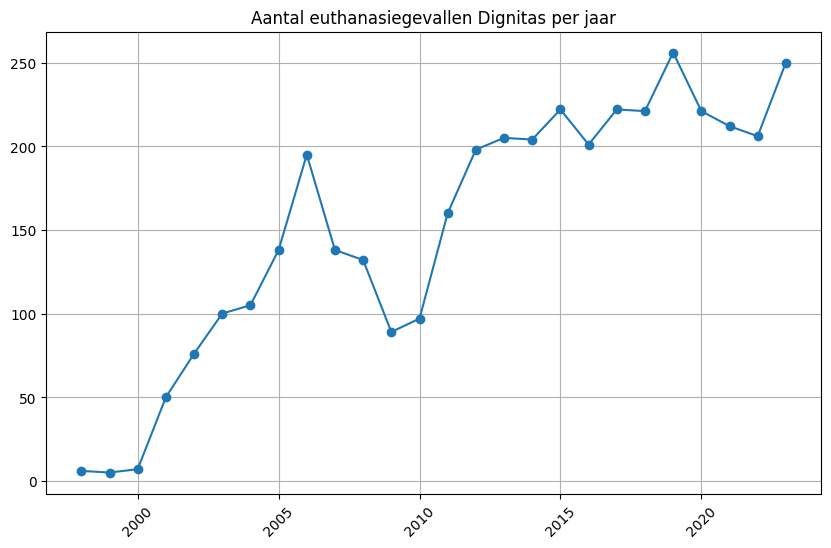

In [19]:
# Filtering the columns related to years
year_columns = [year for year in range(1998, 2024)]
yearly_suicides = suicides[year_columns].sum()

# Plotting the overall trend over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_suicides.index, yearly_suicides.values, marker='o')
plt.title('Aantal euthanasiegevallen Dignitas per jaar')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Weergeef het totale aantal euthanasiegevallen per land over de gehele periode.

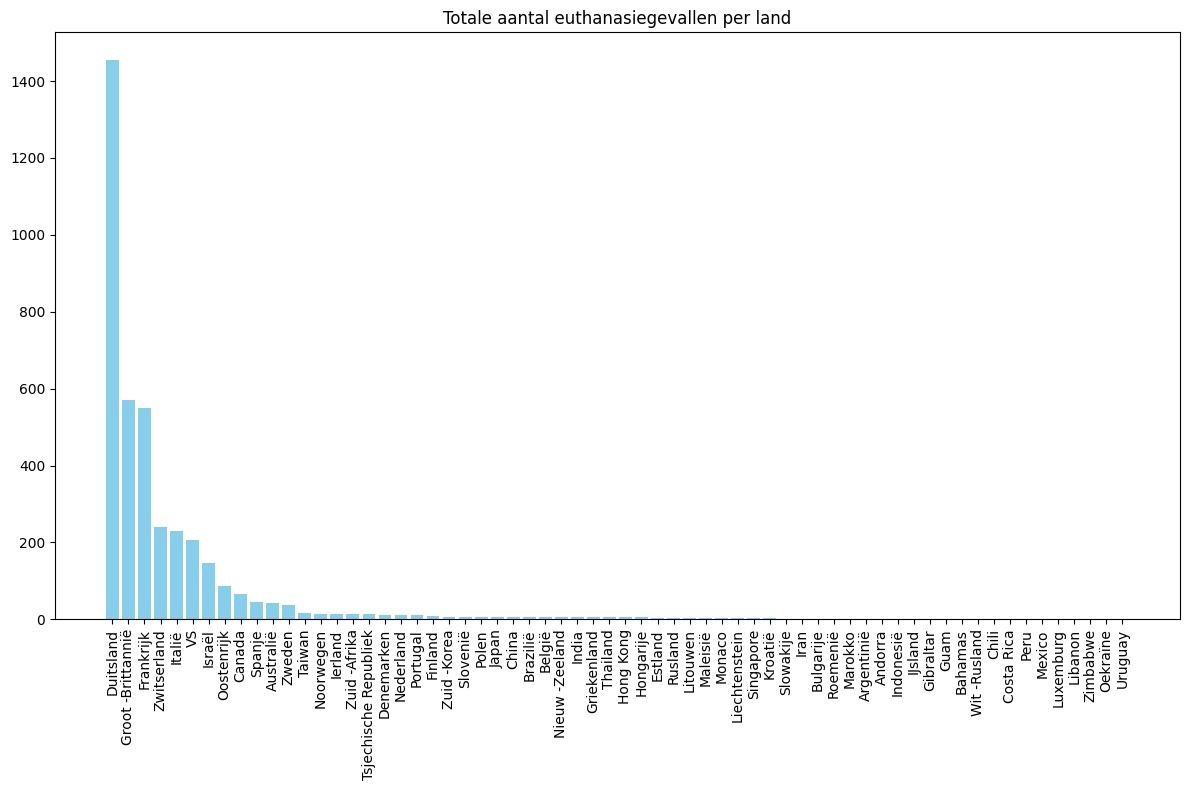

In [17]:
# Sorting the data based on the total amount of assisted suicides
suicides_sorted = suicides.sort_values(by='Total', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(suicides_sorted['Land van Verblijf'], suicides_sorted['Total'], color='skyblue')
plt.title('Totale aantal euthanasiegevallen per land')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 2. Aantal Dignitas-patienten naar populatie van elk land

Om een idee te krijgen over de populairiteit van zelfdoding per land, vergelijken we het aantal Dignitas-patienten met de populatiegrootte van het land.

In [32]:
population_dict = {
    'Zwitserland': 8806000,
    'Duitsland': 84000000,
    'Groot -Brittannië': 67200000,
    'Frankrijk': 65200000,
    'Oostenrijk': 8956000,
    'Italië': 58800000,
    'Andorra': 79278,
    'Argentinië': 45538400,
    'Australië': 26451124,
    'Bahamas': 407906,
    'Wit -Rusland': 9370000,
    'België': 11550000,
    'Brazilië': 214000000,
    'Bulgarije': 6700000,
    'Chili': 19658835,
    'China': 1412000000,
    'Costa Rica': 5180000,
    'Denemarken': 5900000,
    'Estland': 1330000,
    'Finland': 5520000,
    'Gibraltar': 34000,
    'Griekenland': 10700000,
    'Guam': 168485,
    'Hong Kong': 7380000,
    'India': 1429000000,
    'Indonesië': 276400000,
    'Ierland': 5380000,
    'IJsland': 376000,
    'Iran': 88000000,
    'Israël': 9650000,
    'Japan': 123500000,
    'Canada': 39300000,
    'Kroatië': 3830000,
    'Libanon': 5100000,
    'Liechtenstein': 39000,
    'Litouwen': 2690000,
    'Luxemburg': 660000,
    'Maleisië': 35126298,
    'Marokko': 37700000,
    'Monaco': 40000,
    'Mexico': 128000000,
    'Nieuw -Zeeland': 5260000,
    'Nederland': 18000000,
    'Noorwegen': 5500000,
    'Peru': 33845617,
    'Polen': 38600000,
    'Portugal': 10300000,
    'Roemenië': 19118479,
    'Rusland': 144000000,
    'Zweden': 10400000,
    'Zimbabwe': 16069056,
    'Singapore': 5800000,
    'Slowakije': 5400000,
    'Slovenië': 2100000,
    'Spanje': 47911579,
    'Zuid -Afrika': 60800000,
    'Zuid -Korea': 51748739,
    'Taiwan': 23317145,
    'Thailand': 70000000,
    'Tsjechische Republiek': 10600000,
    'Oekraïne': 37732836,
    'Hongarije': 9600000,
    'Uruguay': 3480000,
    'VS': 339000000
}

# Adding the population column
suicides['Population'] = suicides['Land van Verblijf'].replace(population_dict)

# Calculate the percentage of assisted suicides compared to the population
suicides['Percentage Suicides per Population'] = (suicides['Total'] / suicides['Population']) * 100

suicides[['Land van Verblijf', 'Population', 'Percentage Suicides per Population']].head()

C:\Users\BRASSE002\AppData\Local\Temp\ipykernel_14684\2010243004.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  suicides['Population'] = suicides['Land van Verblijf'].replace(population_dict)


,Land van Verblijf,Population,Percentage Suicides per Population
0,Zwitserland,8806000,0.002737
1,Duitsland,84000000,0.001731
2,Groot -Brittannië,67200000,0.000850
3,Frankrijk,65200000,0.000842
4,Oostenrijk,8956000,0.000960


In [23]:
yearly_suicides.to_csv("data/jaarlijkse_euthanasie.csv")
suicides_sorted.to_csv("data/euthanasie_totaal.csv", index=False)